# Machine Learning (ML) Models

In [198]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data preparation or data manipulation
import seaborn as sns # Statistical data visualization
import matplotlib.pyplot as plt #plotting and data visualization
%matplotlib inline
# ML libraries
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Control Display | optional
pd.options.display.max_columns =50
sns.set(style='darkgrid', rc={'axes.facecolor':'#DCDCDC'})

# ignore warnings
import warnings
warnings.filterwarnings ('ignore')



In [199]:
# Load dataset
df = pd.read_csv('heart_disease.csv')
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [200]:
# Logistic Regression
# Predict one or more possible outcomes (usually represented as 0 or 1)
# column targets
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [201]:
# Get the mean for training data
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


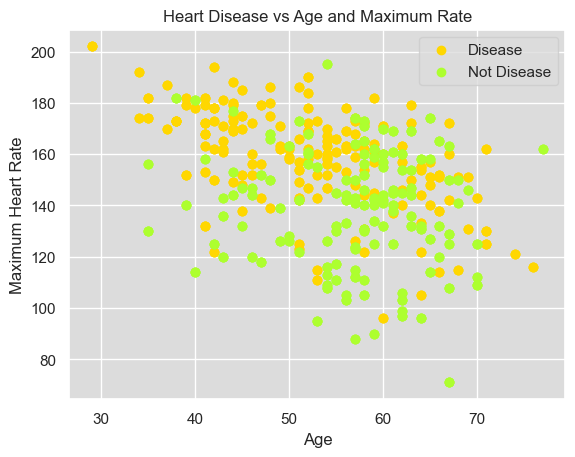

In [202]:
# Create a scatter plot for Heart Disease vs Age and Maximum Heary Rate
plt.scatter(x=df.age[df.target ==1], y= df.thalach[df.target ==1], c='#FFD700', label='Disease')
plt.scatter(x=df.age[df.target ==0], y= df.thalach[df.target ==0], c='#ADFF2F', label='Not Disease')

# Add a legend
plt.legend()
#Add labels to the axes
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate')

# Set the title of the plot 
plt.title('Heart Disease vs Age and Maximum Rate')

# Show the plot
plt.show()

In [203]:
# Create a Logistic Regression
# Help to solve the problem with classification
# Create independent variables and dependent variables

y =df.target.values
x_data = df.drop(['target'], axis = 1)


In [204]:
# Normalize the data
x = (x_data - np.min(x_data))/ (np.max(x_data)) - np.min(x_data) 

# Split the data 80% for training and 20% for testing


In [205]:
# Split the data 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



In [206]:
# Transpose matrices
x_train  = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T


# Accuracy using the LogisticRegression function

In [207]:
# Get the accuracy using the LogisticRegression function
# Get the Test Accuracy

accuracies = {}
lr = LogisticRegression()

lr.fit(x_train.T, y_train.T)

# Reshape the y_test variable to be 1D
y_test = y_test.flatten()

acc = lr.score(x_test.T, y_test) * 100

accuracies['LogisticRegression'] = acc

# Get the output
print("Test Accuracy: {:.2f}%".format(acc))

Test Accuracy: 86.83%


# Accuracy for K-Nearest Neighbors algorithm

In [208]:
# First import the K-Nearest Neighbors (KNN) classification
# Get the accuracy score of the K-Nearest Neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors= 2)
knn.fit(x_train.T, y_train.T)
prediction = knn.predict(x_test.T)

# Get output display
print("{} NN Score: {:.2f}%".format(2, knn.score(x_test.T, y_test.T) * 100))

2 NN Score: 100.00%


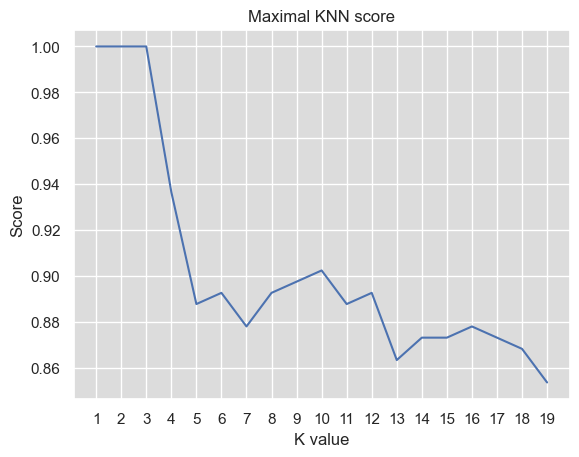

Maximum KNN score is 100.00


In [209]:
# Get Maximum KNN score for the model
score_list =[]
for i in range(1, 20):
    knn2 = KNeighborsClassifier(n_neighbors=i) # Get n_neighbors means k
    knn2.fit(x_train.T, y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))

# Show using list plot
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1, 20, 1))
plt.xlabel('K value')
plt.ylabel('Score')
plt.title('Maximal KNN score')
plt.show()

# Get Maximum KNN score for the model in percentage
acc = max(score_list)*100
accuracies['KNN'] = acc
print('Maximum KNN score is {:.2f}'.format(acc))


# Accuracy using the support vector machine (SVM) algorithm

In [210]:
# set Test accuracy using the support vector machine (SVM) algorithm
from sklearn.svm import SVC
svm = SVC(random_state=1)
svm.fit(x_train.T, y_train)

acc =svm.score(x_train.T, y_train)*100
accuracies['SVM'] =acc
print('Test Accuracy of svm Algorithm: {:.2f}'.format(acc))

Test Accuracy of svm Algorithm: 51.10


# Accuracy using the Naive Bayes Algorithm

In [211]:
# Get accuracy using the Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train.T, y_train.T)

acc = nb.score(x_test.T, y_test.T)*100
accuracies['Naive Bayes'] = acc
print('Acurracy of Naive Bayes: {:.2f}'.format(acc))


Acurracy of Naive Bayes: 85.37


# Accuracy using decision tree model

In [212]:
# Get accuracy using decision tree model
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train.T, y_train.T)

acc = dtc.score(x_test.T, y_test.T)*100
accuracies['Decision Tree'] = acc

print('Decision Tree Test Accuracy {:.2f}%'.format(acc))

      

Decision Tree Test Accuracy 100.00%


# Accuracy of Random ForestClassification Algorithm

In [213]:
# Get Accuracy of Random ForestClassification Algorithm
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(x_train.T, y_train.T)

acc = rf.score(x_train.T, y_train.T)*100
accuracies['Random Forest'] = acc

print('Random Forest Algorithm Accuracy: {:.2f}%'.format(acc))
      

Random Forest Algorithm Accuracy: 100.00%


# compare the models accuracies using the barplot 


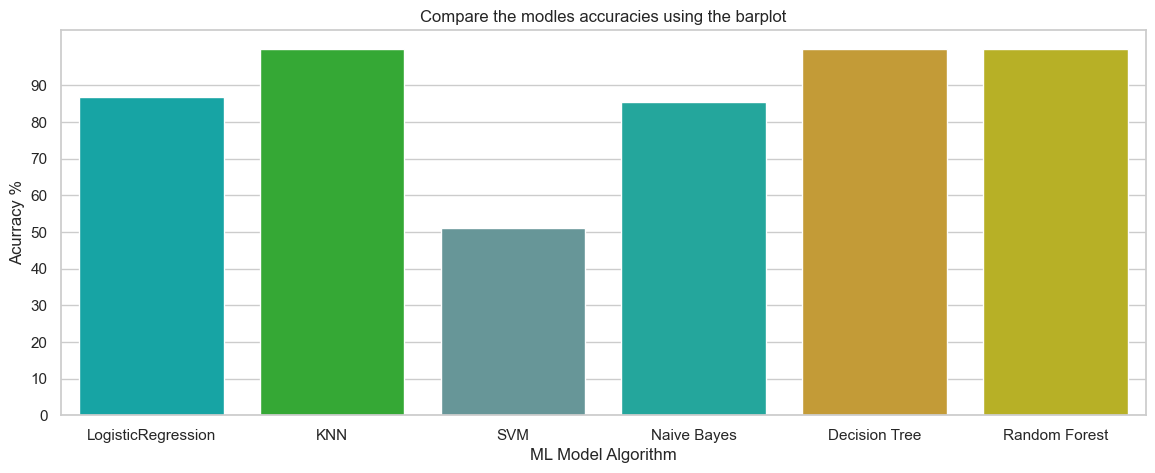

In [214]:
# compare the models accuracies using the barplot from sns
colors = ['#00BBBB', '#22BB22', '#5F9EA0', '#0FBBAE', '#DAA520','#CFC60E']

sns.set_style('whitegrid')
plt.figure(figsize=(14, 5))
plt.yticks(np.arange(0,100,10))
plt.ylabel('Acurracy %')
plt.title('Compare the modles accuracies using the barplot')
plt.xlabel('ML Model Algorithm')
sns.barplot(x = list(accuracies.keys()), y = list(accuracies.values()),palette= colors)
plt.show()

# ML Confusion Matrix

In [215]:
# ML Confusion Matrix
# Evaluate the performance of the a classification model
# Get confision matrices to look at imbalances dataset
# Predicted values

y_head_lr = lr.predict(x_test.T)
knn3 = KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train.T, y_train.T)
y_head_Knn = knn3.predict(x_test.T)
y_head_svm = svm.predict(x_test.T)
y_head_nb = nb.predict(x_test.T)
y_head_dtc = dtc.predict(x_test.T)
y_head_rf = rf.predict(x_test.T)
 



In [216]:
# import model for confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_head_lr)
cm_Knn = confusion_matrix(y_test, y_head_Knn)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_dtc = confusion_matrix(y_test, y_head_dtc )
cm_rf = confusion_matrix(y_test, y_head_rf)
cm_nb= confusion_matrix(y_test, y_head_rf)

# Plotting for heatmap using confusion matrices


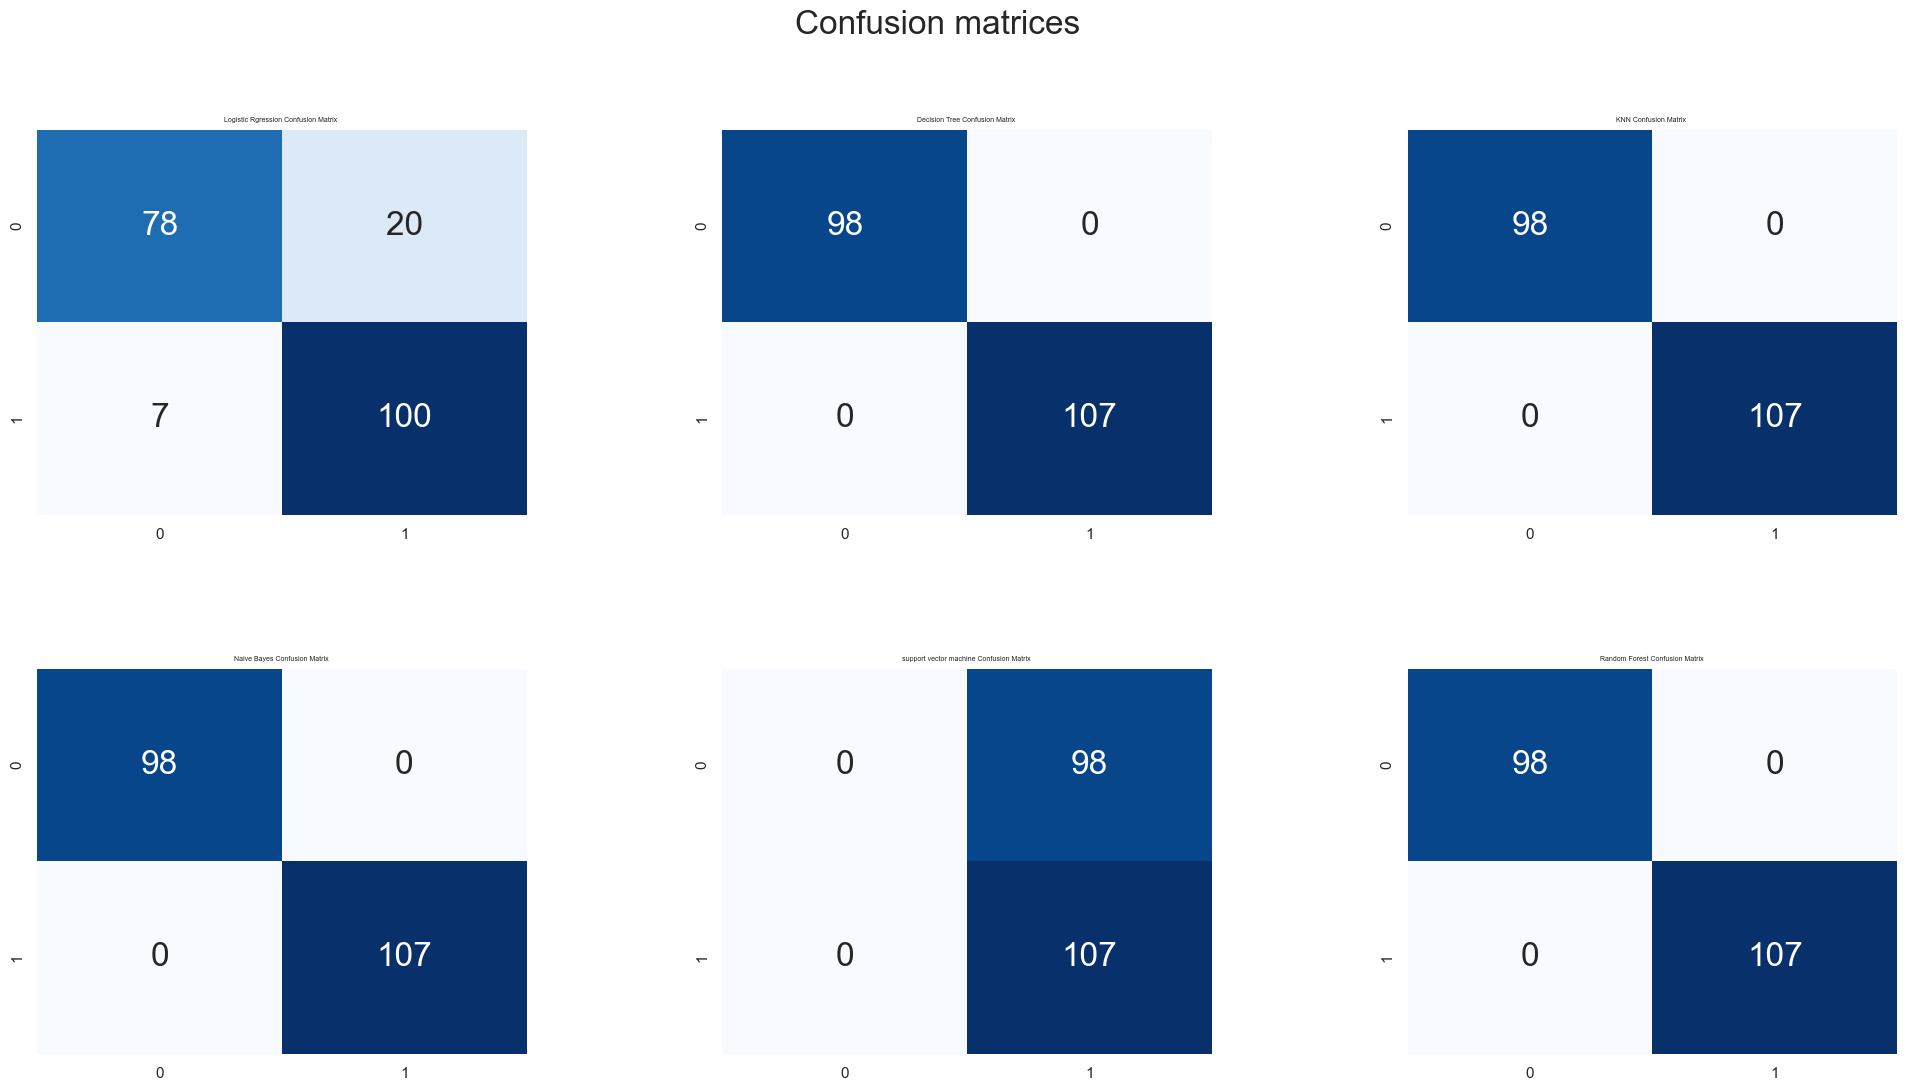

In [226]:
# Plotting for heatmap using confusion matrices
plt.figure(figsize =(24, 12))

plt.suptitle("Confusion matrices", fontsize =24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Logistic Regression Confusion Matrix using headmap
plt.subplot(2, 3, 1)
plt.title("Logistic Rgression Confusion Matrix ", fontsize=5)
sns.heatmap(cm_lr, annot=True, cmap = 'Blues', fmt='d', cbar =False, annot_kws ={'size':24})

# Decision Tree Confusion Matrix using headmap
plt.subplot(2, 3, 2)
plt.title("Decision Tree Confusion Matrix ", fontsize=5)
sns.heatmap(cm_dtc, annot=True, cmap = 'Blues', fmt='d', cbar =False, annot_kws ={'size':24})

# KNN Confusion Matrix using headmap
plt.subplot(2, 3, 3)
plt.title("KNN Confusion Matrix ", fontsize=5)
sns.heatmap(cm_Knn, annot=True, cmap = 'Blues', fmt='d', cbar =False, annot_kws ={'size':24})


# Naive Bayes Confusion Matrix using headmap
plt.subplot(2, 3, 4)
plt.title("Naive Bayes Confusion Matrix ", fontsize=5)
sns.heatmap(cm_nb, annot=True, cmap = 'Blues', fmt='d', cbar =False, annot_kws ={'size':24})


# support vector machine Confusion Matrix using headmap
plt.subplot(2, 3, 5)
plt.title("support vector machine Confusion Matrix ", fontsize=5)
sns.heatmap(cm_svm, annot=True, cmap = 'Blues', fmt='d', cbar =False, annot_kws ={'size':24})


# support vector machine Confusion Matrix using headmap
plt.subplot(2, 3, 6)
plt.title("Random Forest Confusion Matrix ", fontsize=5)
sns.heatmap(cm_rf, annot=True, cmap = 'Blues', fmt='d', cbar =False, annot_kws ={'size':24})


plt.show()